<a href="https://colab.research.google.com/github/AmirRezaBehzad/Image-Encryption/blob/main/Shuffle_ImageEncryption_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original image's shape is (2160, 3840, 3)
Grayscale image's shape is (2160, 3840)


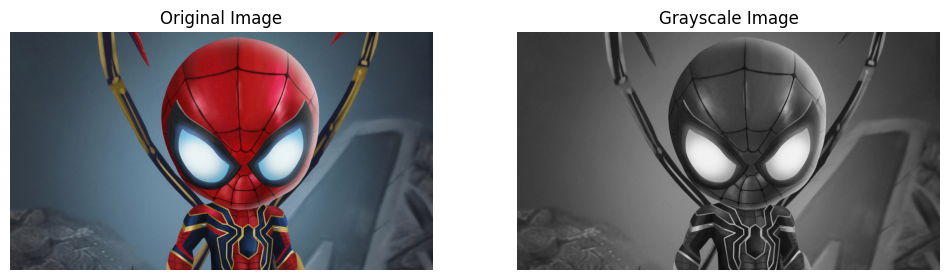

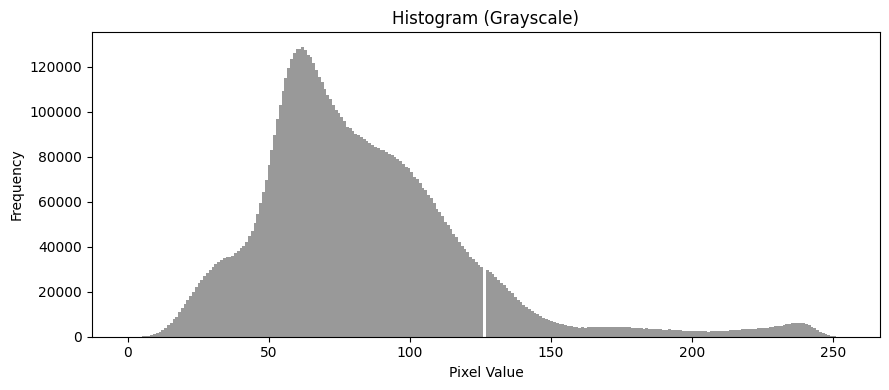

In [12]:
# Import necessary libraries
import re
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load the original image
image_path = '/content/SpiderMan.jpg'
original_image = cv2.imread(image_path)

# Convert the original image to grayscale
grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Display the original and grayscale images side by side
plt.figure(figsize=(12, 6))

# Subplot for the original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Subplot for the grayscale image
plt.subplot(1, 2, 2)
plt.imshow(grayscale_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis('off')

# Calculate and plot histogram of the grayscale image
plt.figure(figsize=(9, 4))
plt.hist(grayscale_image.ravel(), bins=256, color='gray', alpha=0.8)
plt.title("Histogram (Grayscale)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.tight_layout()  # Adjust layout to prevent overlap

print(f"Original image's shape is {original_image.shape}")
print(f"Grayscale image's shape is {grayscale_image.shape}")

plt.show()

In [13]:
# Input key for encryption
InputKey = input("Enter integers in the format (M1, M2, M3, ..., Mn) for your encryption key: ")

# Generate S-box
def generate_sbox():
    sbox = np.arange(256)
    np.random.shuffle(sbox)
    return sbox

# Substitute bytes using S-box
def substitute_bytes(image, sbox):
    return sbox[image]

# Encrypt the grayscale image using SEA algorithm
def sea_encryption(image, key):
    # Generate S-box for substitution
    sbox = generate_sbox()

    # Extract integers using regular expression
    KeyValues = re.findall(r'\d+', key)
    n = len(KeyValues)

    # Convert extracted strings to integers
    for i in range(n):
      KeyValues[i] = int(KeyValues[i])

    # Make a copy of the original image to encrypt
    encrypted_image = image.copy()

    # Iterate over each integer in the key
    for i in range(n):
      # Get the value of the current bit to fix
      fixBit = KeyValues[i]

      # Shift and encrypt the image based on the current bit
      shifted_encrypted_image = (encrypted_image >> fixBit) & 1

      # Convert shifted image to a 1D array
      D = np.array(shifted_encrypted_image).reshape(-1)

      # Divide the array into two parts based on the value of the bit
      S0 = np.where(D == 0)[0]
      S1 = np.where(D == 1)[0]

      # Concatenate the two parts to create a shuffle vector
      shuffle = np.concatenate((S0, S1))

      #  Reshape encrypted_image before indexing to avoid out-of-bounds error
      encrypted_image = encrypted_image.reshape(-1)

      # Shuffle the pixels based on the shuffle vector
      encrypted_image = encrypted_image[shuffle]

       # Substitute the pixels using the S-box
      encrypted_image = sbox[encrypted_image]

    return encrypted_image

Enter integers in the format (M1, M2, M3, ..., Mn) for your encryption key: (1)


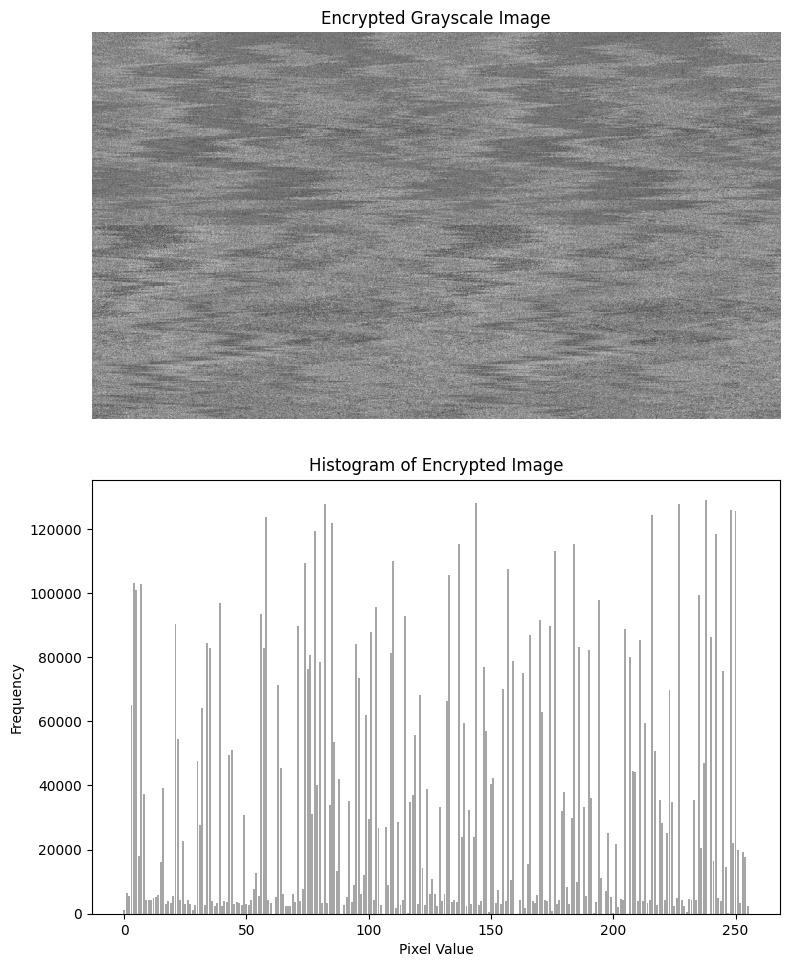

In [14]:
# Encrypt the grayscale image
encrypted_image = sea_encryption(grayscale_image, InputKey)
encrypted_image = np.reshape(encrypted_image, grayscale_image.shape)

# Calculate the histogram of the encrypted image
hist, bins = np.histogram(encrypted_image.flatten(), bins=256, range=(0, 256))

# Plot the encrypted image and its histogram
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# Plot the encrypted image
ax[0].imshow(encrypted_image, cmap="gray")
ax[0].set_title("Encrypted Grayscale Image")
ax[0].axis('off')

# Plot the histogram of the encrypted image
ax[1].bar(range(256), hist, color='gray', alpha=0.7)
ax[1].set_title("Histogram of Encrypted Image")
ax[1].set_xlabel("Pixel Value")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


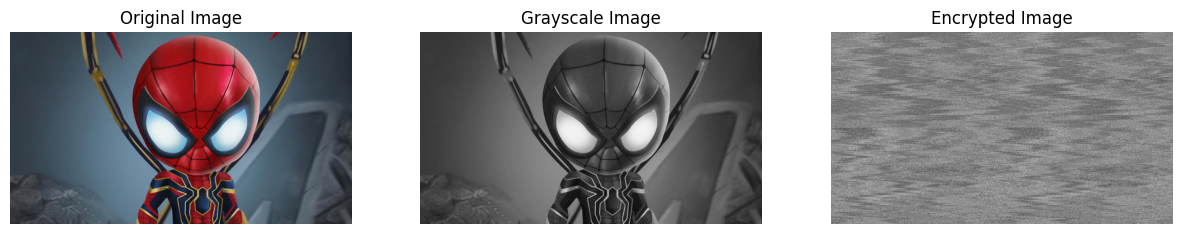

In [15]:
# Display the images side by side
plt.figure(figsize=(15, 5))

# Subplot for the original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Subplot for the grayscale image
plt.subplot(1, 3, 2)
plt.imshow(grayscale_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis('off')

# Subplot for the encrypted image
plt.subplot(1, 3, 3)
plt.imshow(encrypted_image, cmap="gray")
plt.title("Encrypted Image")
plt.axis('off')

plt.show()